In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from arcs.generate import GraphGenerator
from arcs.traversal import Traversal
from arcs.generate import GenerateInitialConcentrations

graph = GraphGenerator().from_file(
    filename='../tests/test_dft_data.json',
    temperature=100,
    pressure=1
)

gic = GenerateInitialConcentrations(graph=graph).update_ic(
    {'H2O':100,'H2':30,'O2':50,'H2S':100,'NO2':200,'N2':300}
    )

t = Traversal(graph=graph)

data = t.sample(initial_concentrations=gic,ncpus=10,nsamples=1000)

In [21]:
from arcs.analysis import AnalyseSampling

analysis = AnalyseSampling(use_markdown=True,use_latex=True)
analysis.reaction_statistics(data)

<string>:4: UserWarning: both use_markdown and use_latex are set to True, proceeding with use_markdown=True


{'2H<sub>2</sub>O + 5O<sub>2</sub> + 2N<sub>2</sub> = 4HNO<sub>3</sub>': 190,
 '2NO<sub>2</sub> + 4HNO<sub>2</sub> = 4HNO<sub>3</sub> + 1N<sub>2</sub>': 110,
 '2H<sub>2</sub>O + 3O<sub>2</sub> + 2N<sub>2</sub> = 4HNO<sub>2</sub>': 210,
 '4H<sub>2</sub>O + 6NO<sub>2</sub> + 1N<sub>2</sub> = 8HNO<sub>2</sub>': 490,
 '2H<sub>2</sub>O + 2SO<sub>2</sub> = 2H<sub>2</sub>S + 3O<sub>2</sub>': 150,
 '8H<sub>2</sub>S + 16NO<sub>2</sub> = 1S<sub>8</sub> + 16HNO<sub>2</sub>': 140,
 '2O<sub>2</sub> + 1H<sub>2</sub> + 1N<sub>2</sub> = 2HNO<sub>2</sub>': 130,
 '3H<sub>2</sub> + 1N<sub>2</sub> = 2NH<sub>3</sub>': 60,
 '1NH<sub>3</sub> + 6HNO<sub>3</sub> + 1N<sub>2</sub> = 9HNO<sub>2</sub>': 20,
 '1H<sub>2</sub>S + 4HNO<sub>3</sub> = 1H<sub>2</sub>SO<sub>4</sub> + 4HNO<sub>2</sub>': 20,
 '1H<sub>2</sub>O + 3HNO<sub>3</sub> + 1N<sub>2</sub> = 5HNO<sub>2</sub>': 10,
 '1H<sub>2</sub> + 4HNO<sub>3</sub> + 1N<sub>2</sub> = 6HNO<sub>2</sub>': 10}

In [12]:
statistics

Counter({'4 H2O + 6 NO2 + 1 N2 = 8 HNO2': 490,
         '2 H2O + 3 O2 + 2 N2 = 4 HNO2': 210,
         '2 H2O + 5 O2 + 2 N2 = 4 HNO3': 190,
         '2 H2O + 2 SO2 = 2 H2S + 3 O2': 150,
         '8 H2S + 16 NO2 = 1 S8 + 16 HNO2': 140,
         '2 O2 + 1 H2 + 1 N2 = 2 HNO2': 130,
         '2 NO2 + 4 HNO2 = 4 HNO3 + 1 N2': 110,
         '3 H2 + 1 N2 = 2 NH3': 60,
         '1 NH3 + 6 HNO3 + 1 N2 = 9 HNO2': 20,
         '1 H2S + 4 HNO3 = 1 H2SO4 + 4 HNO2': 20,
         '1 H2O + 3 HNO3 + 1 N2 = 5 HNO2': 10,
         '1 H2 + 4 HNO3 + 1 N2 = 6 HNO2': 10})

In [11]:
from arcs.analysis import AnalyseSampling

analysis = AnalyseSampling()

analysis.latex_equation(equations[0],use_markdown=False)

'2H$_2$O + 5O$_2$ + 2N$_2$ = 4HNO$_3$'

/Users/badw/miniconda3/envs/py311/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


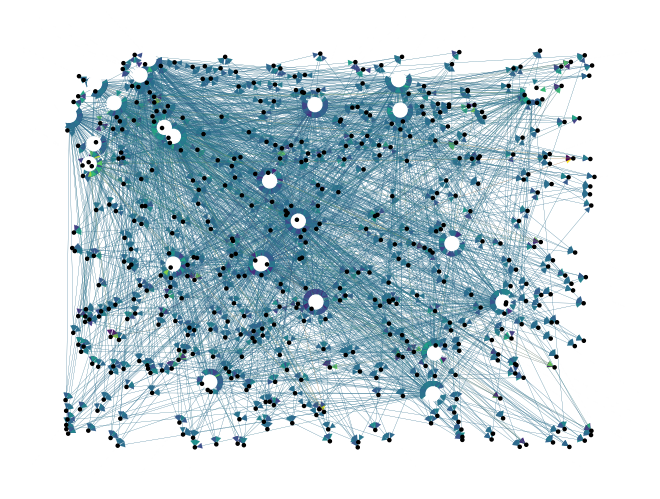

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np 
G = graph 

node_colours= []
node_sizes = []
for node in list(G.nodes):
    if isinstance(node,int):
        node_colours.append('black')
        node_sizes.append(5)
    else:
        node_colours.append('white')
        node_sizes.append(100)

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
vmin = np.min(weights)
vmax = np.max(weights)
cmap = plt.cm.viridis

nx.draw_random(G,node_color=node_colours,node_size=node_sizes,edgelist=edges,edge_color=weights,width=0.1,edge_cmap=cmap,vmin=vmin,vmax=vmax)

### Speed Test 

In [ ]:
from arcs.traversal import Traversal
from arcs.generate import GenerateInitialConcentrations

gic = GenerateInitialConcentrations(graph=graph).update_ic({'H2O':100,'H2':30,'O2':50,'H2S':100,'NO2':200,'N2':300})
t = Traversal(graph=graph)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=1)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=2)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=4)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=10)